# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

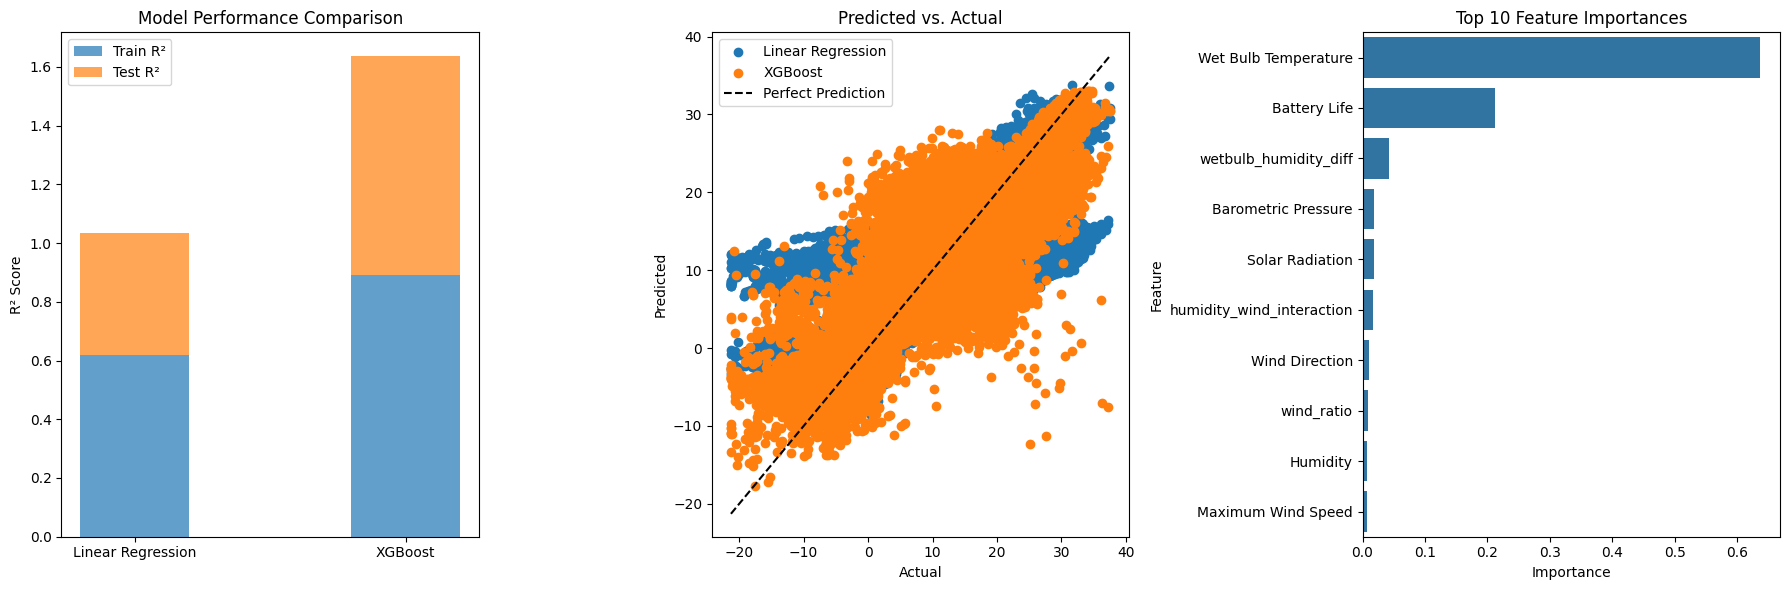

In [2]:
# Generate output/q8_final_visualizations.png

# calculating for linear regression
r2_train_linear = 0.6189
r2_test_linear = 0.4154
r2_train_xgb= 0.8918
r2_test_xgb = 0.7441

fig, axes = plt.subplots(1,3, figsize = (18,6))
# model performance comparison
models = ['Linear Regression', 'XGBoost']
train_r2 = [r2_train_linear, r2_train_xgb]
test_r2 = [r2_test_linear, r2_test_xgb]

axes[0].bar(models, train_r2, width = 0.4, label = 'Train R²', alpha = 0.7)
axes[0].bar(models, test_r2, width = 0.4, label = 'Test R²', alpha = 0.7, bottom = train_r2 )
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Performance Comparison')
axes[0].legend()

# predicted vs. actual
axes[1].scatter(predictions['actual'], predictions['predicted_linear'], label = 'Linear Regression')
axes[1].scatter(predictions['actual'], predictions['predicted_xgboost'], label = 'XGBoost')
axes[1].plot([predictions['actual'].min(), predictions['actual'].max()],
             [predictions['actual'].min(), predictions['actual'].max()],
              color = 'black', linestyle = '--', label = 'Perfect Prediction')
axes[1].set_xlabel ('Actual')
axes[1].set_ylabel ('Predicted')
axes[1].set_title('Predicted vs. Actual')
axes[1].legend()


# Feature importance 
top_features = feature_importance.sort_values('importance', ascending = False).head(10)
sns.barplot(x = 'importance', y = 'feature',data = top_features, ax=axes[2])
axes[2].set_title('Top 10 Feature Importances')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Feature')

plt.tight_layout()
plt.savefig('output/q8_final_visualizations.png', dpi = 150)
plt.show()







In [3]:
# Generate output/q8_summary.csv

# linear regression metrics 
r2_linear = 0.4154
rmse_linear = 7.6939
mae_linear = 5.7413

# xgboost metrics 
r2_xgb = 0.7441
rmse_xgb = 5.0905
mae_xgb = 3.2852

summary_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MAE'],
    'Linear Regression': [r2_linear, rmse_linear, mae_linear],
    'XGBoost': [r2_xgb, rmse_xgb, mae_xgb]
})

summary_df.to_csv('output/q8_summary.csv', index = False)


In [10]:
# Generate output/q8_key_findings.txt
best_model = "XGBoost" if r2_xgb > r2_linear else "Linear Regression"
top_features = feature_importance.sort_values('importance', ascending = False).head(3)
top_features_list = [f"{row['feature']} (importance: {row['importance']:.2f})" for idx, row in top_features.iterrows()]
top_features_text = ", ".join(top_features_list)

temporal_patterns = [
    "- Clear seasonal patterns in temperature data",
    "- Warmer in summer and cooler in winter",
    "- Monthly cycles are important predictors"
]

data_quality_summary = [
    "- Dataset cleaned: 13,426 rows (196,194 to 182,768 rows)",
    "- Missing values handled via ffill, bfill, median, and mode depending on the data type",
    "- Outliers capped using IQR method"
]

with open('output/q8_key_findings.txt', 'w')as f:
    f.write("KEY FINDINGS SUMMARY:\n")
    f.write("====================\n\n")
    # Model performance
    f.write("MODEL PERFORMANCE:\n")
    f.write(f"- Best performing model: {best_model}(R² = {r2_xgb:.2f}, RMSE = {rmse_xgb:.2f}, MAE = {mae_xgb:.2f})\n")
    f.write(f"- Linear Regression (R² = {r2_linear:.2f}, RMSE = {rmse_linear:.2f}, MAE = {mae_linear:.2f})\n")
    f.write(f"- {best_model} outperforms Linear Regression\n")
    f.write("\n")
    # Feature importance
    f.write("FEATURE IMPORTANCE:\n")
    f.write(f" - Top 3 features: {top_features_text}\n")
    f.write("\n")
    # Temportal patters 
    f.write("TEMPORAL PATTERNS:\n")
    for line in temporal_patterns:
        f.write(f"{line}\n")
    f.write("\n")
    # Data quality
    f.write("DATA QUALITY:\n")
    for line in data_quality_summary:
        f.write(f"{line}\n")

 



---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.
